# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [108]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import sys; sys.path.append('../Modles and Modeling/src')
import numpy as np
import plotly_express as px

In [110]:
import pandas as pd
import ipywidgets as widgets

In [111]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the validation set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. What is the best model and model params? How stable is it? 
1. What is the most stable model and model params? How good is it? 
1. Does regularization help for linear models? 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? 
1. Are the noise level effect the number of datapoints needed to reach minimal test results? 
1. Select the best model param to fit the data (The one minimizing the test error) and for it, observe the number of data points needed for optimal test results in different noise levels.

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [112]:
from sklearn.datasets import make_moons

In [113]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

x         y label
0 -0.014174  0.944411     A
1 -0.963779  0.200220     A
2 -0.925823  0.300820     A
3  0.519294  0.854378     A
4  0.896427  0.408292     A

In [84]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [114]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

x         y label
0 -0.635192  0.486344     B
1 -0.428661 -0.675462     B
2 -0.992115  0.125333     A
3  0.899405 -0.437116     A
4  0.798990  0.040195     B

In [115]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Buliding the experiment

Start with one dataframe holding all the data for both datastes with different noise level. Use the make_<dataset_name>_dataframe() functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use df = pd.DataFrame() to start with an empty dataframe and using a loop, add data to it using df = df.append(<the needed df here>). Verify that you have 10k samples for each dataset type and noise level by a proper .value_counts(). You can modify the

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

In [116]:
def make_modeling_exercise_dataframe():
    df = pd.DataFrame()
    noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    for x in noise_levels:
        df_circles = make_circles_dataframe(n_samples=10000, noise_level=x) 
        df_circles['dataset_name'] = 'circles'
        df_circles['noise_level'] =  x
        df = pd.concat([df, df_circles])    
        df_moons = make_moons_dataframe(n_samples=10000, noise_level=x)
        df_moons['dataset_name'] = 'moons'
        df_moons['noise_level'] =  x
        df = pd.concat([df, df_moons]) 
    return df
        
df = make_modeling_exercise_dataframe()    


## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [88]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:
df.groupby(['dataset_name', 'noise_level']).size()

dataset_name  noise_level
circles       0.0            10000
              0.1            10000
              0.2            10000
              0.3            10000
              0.4            10000
              0.5            10000
moons         0.0            10000
              0.1            10000
              0.2            10000
              0.3            10000
              0.4            10000
              0.5            10000
dtype: int64

You experiment code should look something like that:

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier



In [443]:
datasets_type = ['circles', 'moons']
k_folds = 10
k_values = [1,3,5,7,9,11,13,15,17,19]
n_samples = [500, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'knn']
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
#            print(n)
            ds = df.query('dataset_name==@ds_type & noise_level==@nl').head(n)
#            print(ds.shape)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                #print(k)
                #print(ds.shape)
                X, Y = ds[['x', 'y']].head(n), ds['label'].map({'A':1, 'B':-1})
                #print('x-y')
                x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=k)
                #print('train_test_split')
                for clf_type in clf_types:
                    if clf_type == 'knn':
                        for k_val in k_values:
                            knn = KNeighborsClassifier(n_neighbors=k_val) #change to k
                            knn.fit(x_train, y_train)
                            predictions = knn.predict(x_test)
                            score1 = cross_validate(knn, x_test, y_test, cv=10, 
                                                scoring=('accuracy', 'r2', 'neg_mean_squared_error'), return_train_score=True) 
#                                print(score1['train_accuracy'].mean(), score1['test_accuracy'].mean(), score1['train_accuracy'].mean() - score1['test_accuracy'].mean() , score1['test_accuracy'].std(),)
                            results.append((ds_type,n,nl,clf_type, '-', score1['train_accuracy'].mean(),score1['test_accuracy'].mean(),score1['train_accuracy'].std(),score1['test_accuracy'].std(),score1['train_accuracy'].mean() - score1['test_accuracy'].mean(),k_val))
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            log_reg = LogisticRegression(penalty='l2', C=regularization_value)
                            log_reg.fit(x_train, y_train)
                            predictions = log_reg.predict(x_test)
                            score1 = cross_validate(log_reg, x_test, y_test, cv=10, 
                                                    scoring=('accuracy', 'r2', 'neg_mean_squared_error'), return_train_score=True) 
                            results.append((ds_type,n,nl,clf_type, regularization_value, score1['train_accuracy'].mean(),score1['test_accuracy'].mean(),score1['train_accuracy'].std(),score1['test_accuracy'].std(),score1['train_accuracy'].mean() - score1['test_accuracy'].mean(), '-'))

df_results=pd.DataFrame(results, columns=['dataset','sample_size','noise_level' ,'clf_type' ,'regularization_value','train_acc','test_acc','train_std','test_std','acc_diff', 'k'])
#df_results.to_csv("./modeling_ex_result.csv", index=False)
#moved from data folder

Working on circles
Starting 10-fold cross validation for circles datasets with 500 samples and noise level 0. Going to train ['log_reg', 'knn'] classifiers.
Starting 10-fold cross validation for circles datasets with 1000 samples and noise level 0. Going to train ['log_reg', 'knn'] classifiers.
Starting 10-fold cross validation for circles datasets with 10000 samples and noise level 0. Going to train ['log_reg', 'knn'] classifiers.
Starting 10-fold cross validation for circles datasets with 500 samples and noise level 0.1. Going to train ['log_reg', 'knn'] classifiers.
Starting 10-fold cross validation for circles datasets with 1000 samples and noise level 0.1. Going to train ['log_reg', 'knn'] classifiers.
Starting 10-fold cross validation for circles datasets with 10000 samples and noise level 0.1. Going to train ['log_reg', 'knn'] classifiers.
Starting 10-fold cross validation for circles datasets with 500 samples and noise level 0.2. Going to train ['log_reg', 'knn'] classifiers.
S

In [121]:
df_results=pd.read_csv('./modeling_ex_result.csv')

### Analysing the expermient results

#### Q1

In [122]:
import plotly_express as px

##### Circels
As presented in the two charts below for Circle KNN and Log Reg, the KNN is predicting the validtation data at 100% for low K values with low sample.
With higher K values and also a larger sample, the model keeps 100% accurecy.
The log regresion is not predicting as good as KNN. It avrages around 50% accurecy.
It shows a sligt improvment with higher regularization value but mainly for low sample. In those cases, the standad deviation is high, at 13%, and there is a 5% diffrence between the train and the test data.
For the circle data, a KNN model with low KNN value is much better and can also handel low noise levels.

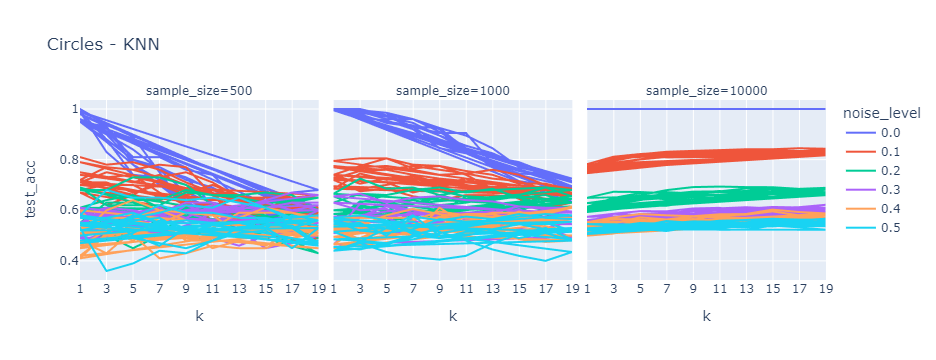

In [123]:
#What is the best model and model params? How stable is it?
df_result_circles_knn = df_results.query('dataset=="circles" and clf_type=="knn"')
df_result_circles_knn.shape
px.line(df_result_circles_knn, x='k', y='test_acc', color='noise_level', title="Circles - KNN", facet_col='sample_size' )


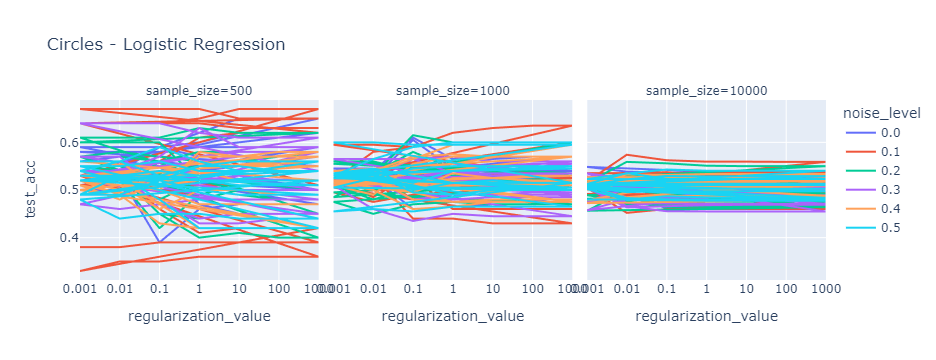

In [124]:
#circles log reg
df_result_circles_log_reg = df_results.query('dataset=="circles" and clf_type=="log_reg"')
df_result_circles_log_reg.shape
px.line(df_result_circles_log_reg, x='regularization_value', y='test_acc', color='noise_level', title="Circles - Logistic Regression", facet_col='sample_size' )


In [125]:
#Circle logistic regression low sameple analysis
df_result_circles_log_reg_500 = df_results.query('dataset=="circles" and clf_type=="log_reg" and sample_size==500')
df_result_circles_log_reg_500.sample(10)

dataset  sample_size  noise_level clf_type regularization_value  \
1075  circles          500          0.2  log_reg                   10   
2603  circles          500          0.5  log_reg                  0.1   
515   circles          500          0.1  log_reg                  100   
579   circles          500          0.1  log_reg                 0.01   
2095  circles          500          0.4  log_reg                   10   
105   circles          500          0.0  log_reg                    1   
1668  circles          500          0.3  log_reg                  0.1   
2551  circles          500          0.5  log_reg                 0.01   
580   circles          500          0.1  log_reg                  0.1   
34    circles          500          0.0  log_reg                0.001   

      train_acc  test_acc  train_std  test_std      acc_diff  k  
1075   0.538889      0.50   0.039830  0.118322  3.888889e-02  -  
2603   0.522222      0.48   0.041870  0.087178  4.222222e-02  -  
515    0.542222      0.39   0.018459  0.144568  1.522222e-01  -  
579    0.547778      0.52   0.022798  0.132665  2.777778e-02  -  
2095   0.536667      0.52   0.019907  0.140000  1.666667e-02  -  
105    0.553333      0.51   0.028458  0.151327  4.333333e-02  -  
1668   0.500000      0.47   0.020488  0.078102  3.000000e-02  -  
2551   0.560000      0.56   0.005443  0.048990  0.000000e+00  -  
580    0.542222      0.52   0.025724  0.132665  2.222222e-02  -  
34     0.550000      0.55   0.005556  0.050000  1.110223e-16  -

##### Moons

As presented in the two charts below for Moons KNN and Log Reg, the KNN is predicting the validation data at 100% for low K values with low sample. with higher K values and also a larger sample, the model keeps 100% accuracy and also handles noise level of up to 0.3 at 90% accuracy.

The logistic regression is not predicting as well as KNN. For low sample and low regulization value, it only gets around 50% accuracy. It shows a significant improvement with higher regularization values but mainly for low sample. For these cases, the standard deviation is high on 13% and there is a 5% difference between the train and the test data. logistic regression with higher sample level shows between 80% to 90% depending on the noise level once we use regularization value of 1. Increasing the regularization value above 1 does not significantly improves the accuracy. For the Moons dataset, a KNN model with high KNN value and large sample, is much better and can also handle low noise levels.



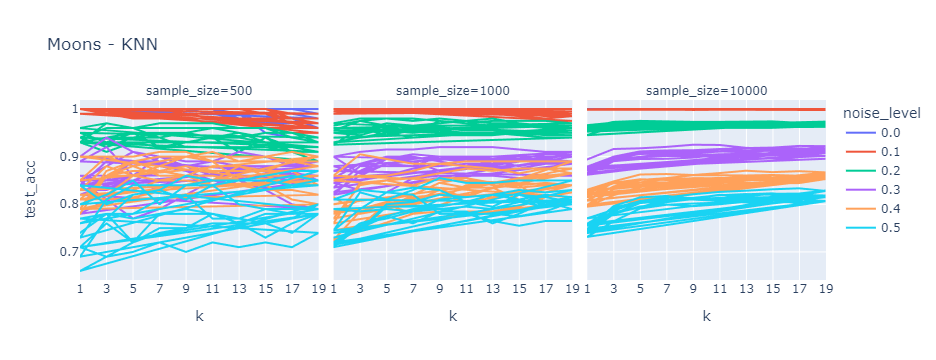

In [126]:
df_result_moons_knn = df_results.query('dataset=="moons" and clf_type=="knn"')
df_result_moons_knn.shape
px.line(df_result_moons_knn, x='k', y='test_acc', color='noise_level', title="Moons - KNN", facet_col='sample_size' )


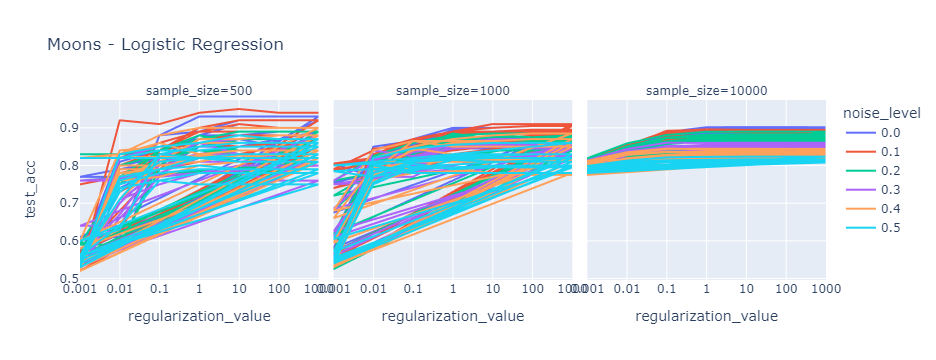

In [127]:
#moons log reg
df_result_moons_log_reg = df_results.query('dataset=="moons" and clf_type=="log_reg"')
df_result_moons_log_reg.shape
px.line(df_result_moons_log_reg, x='regularization_value', y='test_acc', color='noise_level', title="Moons - Logistic Regression", facet_col='sample_size' )


#### Q2

##### Circles

As presented in the charts below, the KNN model with high sample data provides a 100% accuracy and 0 standard deviation for all K values.
this model is accurate and also extremely stable.


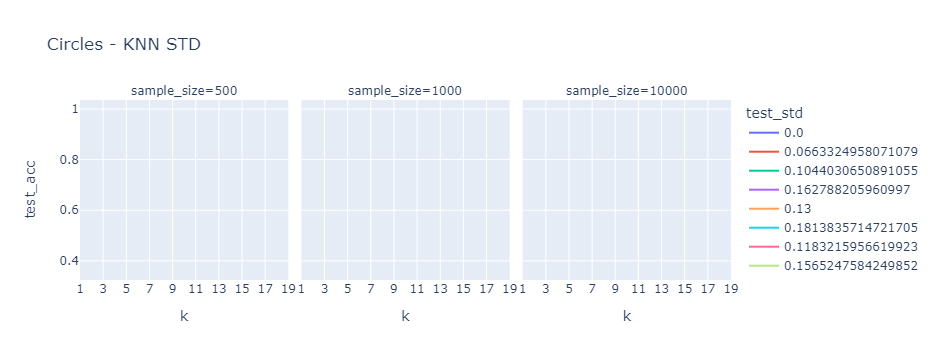

In [128]:
px.line(df_result_circles_knn, x='k', y='test_acc', color='test_std', title="Circles - KNN STD", facet_col='sample_size' )

##### Moons

As presented in the charts below, the KNN model with high sample data provides a 100% accuracy and 0 standard deviation for all K values.
this model is accurate and also extremely stable.


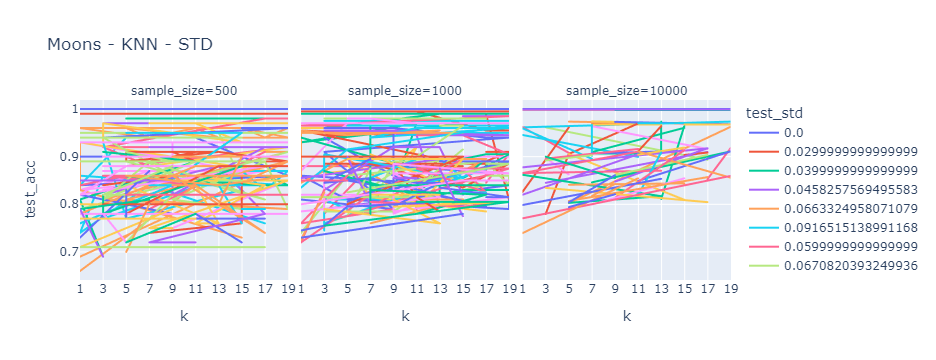

In [129]:
px.line(df_result_moons_knn, x='k', y='test_acc', color='test_std', title="Moons - KNN - STD", facet_col='sample_size' )

#### Q3


##### Circles

As presented in the chart below, for circles dataset the regularization level has no significant impact at an noise level.

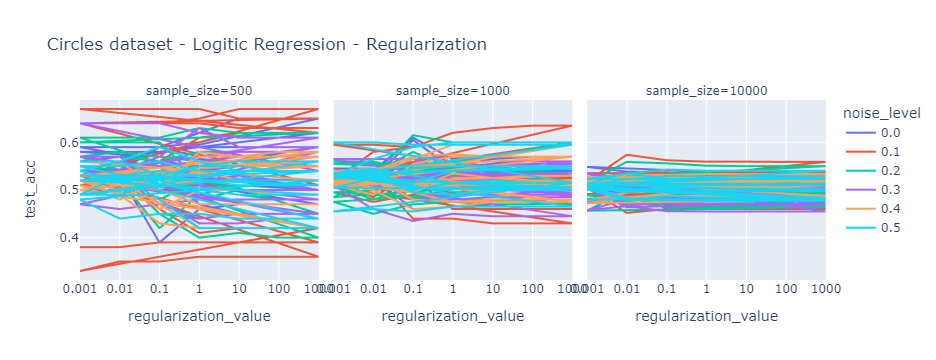

In [130]:
px.line(df_result_circles_log_reg,x='regularization_value',y='test_acc',
               color='noise_level',facet_col='sample_size',
               title='Circles dataset - Logitic Regression - Regularization')


##### Moons

As presented in the charts below, for the moons dataset the log regression, the regularization value is improving the accuracy.
this is contributing on lower samples at all noise level.
this is also contributing in higher sample.
for higher samples around regularization value of 1 the model is getting to its highest accuracy.


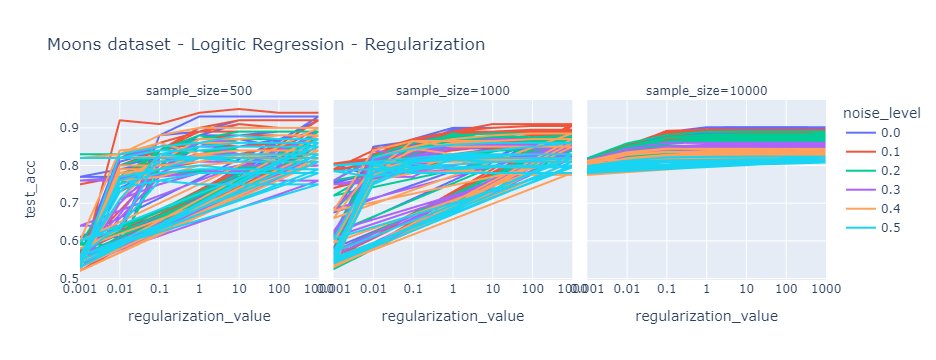

In [131]:
px.line(df_result_moons_log_reg,x='regularization_value',y='test_acc',
               color='noise_level',facet_col='sample_size',
               title='Moons dataset - Logitic Regression - Regularization')

#### Q4

##### Circles

For a given noise level of your choice, How does the train, test and difference error changes with increasing data sizes?
I'll test for noise level of 0.3.
as seen in the chart and sample data below. the higher the K is, the lower the difference error is.
the impact on the performance is much more significant in lower K values

For logistic regression, the accuracy error is lower for higher sample size and is almost 0 for low regularization value.
for lower sampler the error is still low and hardly impacted by regularization value.


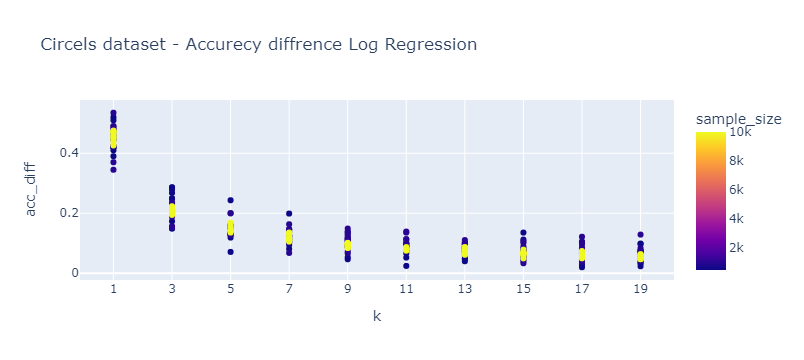

In [132]:
px.scatter(df_result_circles_knn.query('noise_level==0.3') ,x='k',y='acc_diff',
               color='sample_size',
               title='Circels dataset - Accurecy diffrence Log Regression')

In [133]:
df_result_circles_knn.query('noise_level==0.3').groupby(by=['k','sample_size']).head(10)

dataset  sample_size  noise_level clf_type regularization_value  \
1537  circles          500          0.3      knn                    -   
1538  circles          500          0.3      knn                    -   
1539  circles          500          0.3      knn                    -   
1540  circles          500          0.3      knn                    -   
1541  circles          500          0.3      knn                    -   
...       ...          ...          ...      ...                  ...   
2035  circles        10000          0.3      knn                    -   
2036  circles        10000          0.3      knn                    -   
2037  circles        10000          0.3      knn                    -   
2038  circles        10000          0.3      knn                    -   
2039  circles        10000          0.3      knn                    -   

      train_acc  test_acc  train_std  test_std  acc_diff   k  
1537   1.000000     0.480   0.000000  0.177764  0.520000   1  
1538   0.777778     0.510   0.021082  0.186815  0.267778   3  
1539   0.763333     0.520   0.025844  0.124900  0.243333   5  
1540   0.708889     0.510   0.032508  0.181384  0.198889   7  
1541   0.671111     0.540   0.021773  0.149666  0.131111   9  
...         ...       ...        ...       ...       ...  ..  
2035   0.682444     0.601   0.003594  0.029900  0.081444  11  
2036   0.667667     0.606   0.004450  0.030887  0.061667  13  
2037   0.662556     0.613   0.005283  0.029257  0.049556  15  
2038   0.660833     0.611   0.004312  0.037135  0.049833  17  
2039   0.657167     0.610   0.002611  0.027568  0.047167  19  

[300 rows x 11 columns]

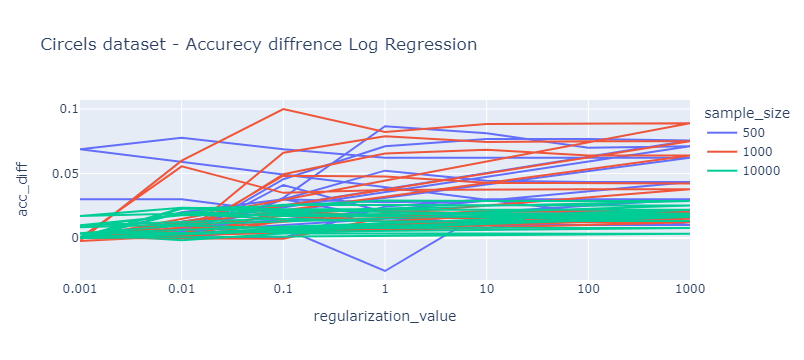

In [134]:
px.line(df_result_circles_log_reg.query('noise_level==0.3') ,x='regularization_value',y='acc_diff',
               color='sample_size',
               title='Circels dataset - Accurecy diffrence Log Regression')

##### Moons

Tested for noise level of 0.3.
as seen in the sample data below. the higher the K is, the lower the difference error is.
the impact on the performance is much more significant in lower K values.
for moons logistic regression there aren't significant changes of error levels when changing sample data size.


In [135]:
df_result_moons_knn.query('noise_level==0.3').groupby(by=['k','sample_size']).head(10)

dataset  sample_size  noise_level clf_type regularization_value  \
4597   moons          500          0.3      knn                    -   
4598   moons          500          0.3      knn                    -   
4599   moons          500          0.3      knn                    -   
4600   moons          500          0.3      knn                    -   
4601   moons          500          0.3      knn                    -   
...      ...          ...          ...      ...                  ...   
5095   moons        10000          0.3      knn                    -   
5096   moons        10000          0.3      knn                    -   
5097   moons        10000          0.3      knn                    -   
5098   moons        10000          0.3      knn                    -   
5099   moons        10000          0.3      knn                    -   

      train_acc  test_acc  train_std  test_std  acc_diff   k  
4597   1.000000    0.8500   0.000000  0.102470  0.150000   1  
4598   0.924444    0.8100   0.014741  0.104403  0.114444   3  
4599   0.866667    0.7700   0.021660  0.100499  0.096667   5  
4600   0.855556    0.7900   0.021660  0.130000  0.065556   7  
4601   0.853333    0.8200   0.012958  0.097980  0.033333   9  
...         ...       ...        ...       ...       ...  ..  
5095   0.921222    0.9110   0.002406  0.021541  0.010222  11  
5096   0.919889    0.9090   0.002917  0.020224  0.010889  13  
5097   0.919833    0.9135   0.002422  0.021800  0.006333  15  
5098   0.918722    0.9120   0.002534  0.022605  0.006722  17  
5099   0.918333    0.9145   0.002064  0.019551  0.003833  19  

[300 rows x 11 columns]

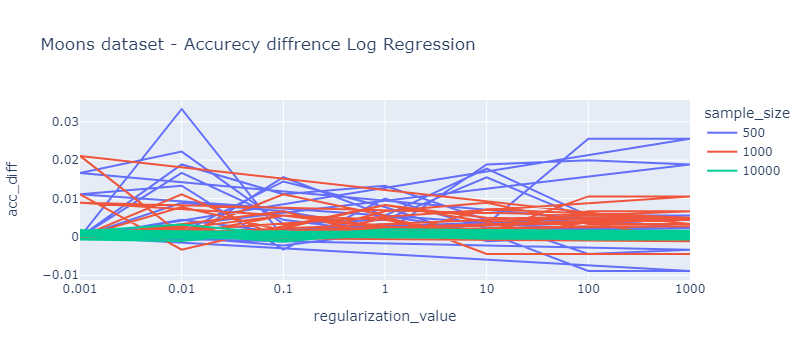

In [136]:
px.line(df_result_moons_log_reg.query('noise_level==0.3') ,x='regularization_value',y='acc_diff',
               color='sample_size',
               title='Moons dataset - Accurecy diffrence Log Regression')

#### Q5

##### Circles

For a given noise level of your choice, How does the train, test and difference error changes with increasing model complexity? 

For Circles KNN we can see that for a lower K (which means more complex model with overfitting) the difference between train and test was much more significant.
the less complex the model is (higher K) the difference was reduced to 5% to 7%.

For Circle Logistic regression which only predicts with around 50% accuracy, the increasement of the regularization value didn't impact the accuracy levels of train vs test.


In [185]:
dfq5 = df_result_circles_knn.query('noise_level==0.3')
dfq5['k'].astype(int)
print("\n Circles KNN Accurecy diffrence \n")
print(dfq5.groupby(by=['sample_size', 'k'], dropna=False).acc_diff.mean().unstack())
#print("\n Circles KNN TRE \n")
#print(dfq5.groupby(by=['sample_size', 'k'], dropna=False).train_acc.mean().unstack())
#print("\n Circles KNN TESTE \n")
#print(dfq5.groupby(by=['sample_size', 'k'], dropna=False).test_acc.mean().unstack())



 Circles KNN Accurecy diffrence 

k                1         3         5         7         9         11  \
sample_size                                                             
500          0.4470  0.228667  0.148889  0.121444  0.095111  0.074444   
1000         0.4535  0.199667  0.148889  0.123500  0.110056  0.105167   
10000        0.4574  0.208228  0.149244  0.119539  0.093667  0.081122   

k                  13        15        17        19  
sample_size                                          
500          0.074444  0.077111  0.066889  0.060333  
1000         0.086889  0.071833  0.075889  0.070167  
10000        0.073139  0.065356  0.058811  0.054617  


In [188]:
dfq5l = df_result_circles_log_reg.query('noise_level==0.3')
print("\n Circles Log Regression Accurecy diffrence \n")
print(dfq5l.groupby(by=['sample_size', 'regularization_value'], dropna=False).acc_diff.mean().unstack())



 Circles Log Regression Accurecy diffrence 

regularization_value     0.001      0.01       0.1         1        10  \
sample_size                                                              
500                   0.009889  0.012778  0.030444  0.035111  0.037889   
1000                 -0.000222  0.012722  0.037056  0.039389  0.040500   
10000                 0.004394  0.017550  0.017672  0.017906  0.017517   

regularization_value       100      1000  
sample_size                               
500                   0.037444  0.037556  
1000                  0.039722  0.039667  
10000                 0.017506  0.017506  


##### Moons

For Moons KNN we can see that for a lower K (which means more complex model with overfitting) the difference between train and test was much more significant.
the less complex the model is (higher K) the difference was reduced to less than 2% (almost 0% for high sample).

For Moons Logistic regression there in hardly any difference in the accuracy level between the train and test data. the change of the regularization value didn't impact the accuracy levels of train vs test.



In [199]:
dfq5m = df_result_moons_knn.query('noise_level==0.3')
dfq5m['k'].astype(int)
print("\n Moons KNN Accurecy diffrence \n")
print(dfq5m.groupby(by=['sample_size', 'k'], dropna=False).acc_diff.mean().unstack())


 Moons KNN Accurecy diffrence 

k                  1        11        13        15        17        19  \
sample_size                                                              
500          0.15400  0.030000  0.022889  0.022444  0.027000  0.020667   
1000         0.14150  0.015778  0.013389  0.011722  0.010111  0.009611   
10000        0.12615  0.009361  0.007967  0.007011  0.006800  0.005356   

k                   3         5         7         9  
sample_size                                          
500          0.058889  0.044333  0.028000  0.030111  
1000         0.054556  0.027722  0.020944  0.016667  
10000        0.038717  0.021350  0.015406  0.012611  


In [200]:
dfq5ml = df_result_moons_log_reg.query('noise_level==0.3')
print("\n Moons Log Regression Accurecy diffrence \n")
print(dfq5ml.groupby(by=['sample_size', 'regularization_value'], dropna=False).acc_diff.mean().unstack())



 Moons Log Regression Accurecy diffrence 

regularization_value     0.001      0.01       0.1         1        10  \
sample_size                                                              
500                   0.002778  0.011778  0.005111  0.005444  0.006667   
1000                  0.004222  0.003278  0.003944  0.004333  0.002500   
10000                 0.000533  0.000406  0.000394  0.000717  0.000700   

regularization_value       100      1000  
sample_size                               
500                   0.004667  0.004667  
1000                  0.003833  0.003222  
10000                 0.000661  0.000594  


#### Q6

##### Circles

For Circles KNN, as presented in the analysis below, for a model without an overfit a larger K value is need for KNN.
Only for higher sample (10,000) is shows charts below. for all K level (beside K=1) there is an improvement for the test accuracy for all noise level as the sample size increases. 
For logistic regression, there is no consistency between different noise level / regularization value and accuracy


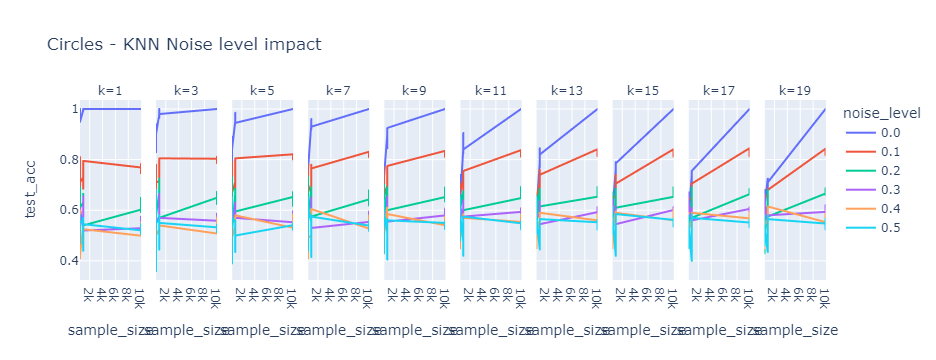

In [210]:
px.line(df_result_circles_knn, x='sample_size', y='test_acc', color='noise_level', title="Circles - KNN Noise level impact", facet_col='k' )

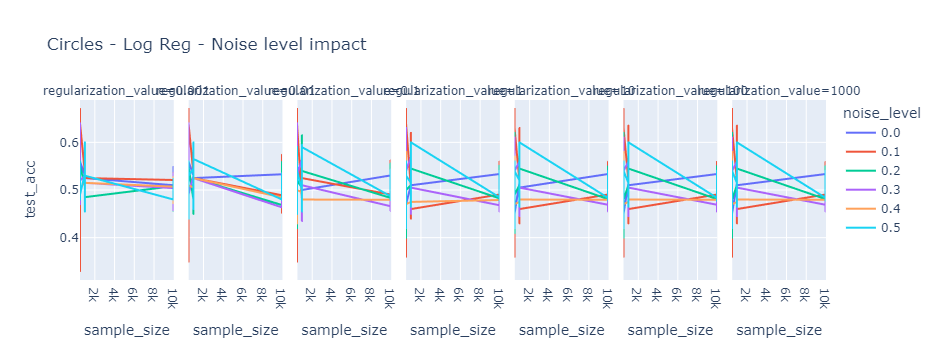

In [208]:

px.line(df_result_circles_log_reg, x='sample_size', y='test_acc', color='noise_level', title="Circles - Log Reg - Noise level impact", facet_col='regularization_value' )


##### Moons

For Moons KNN, as presented in the analysis below, for noise level a lager sample is needed.
As shown below, this is valid for all K values that were tested.

For logistic regression with K above 1, there is an improvement in the test accuracy for lager samples.


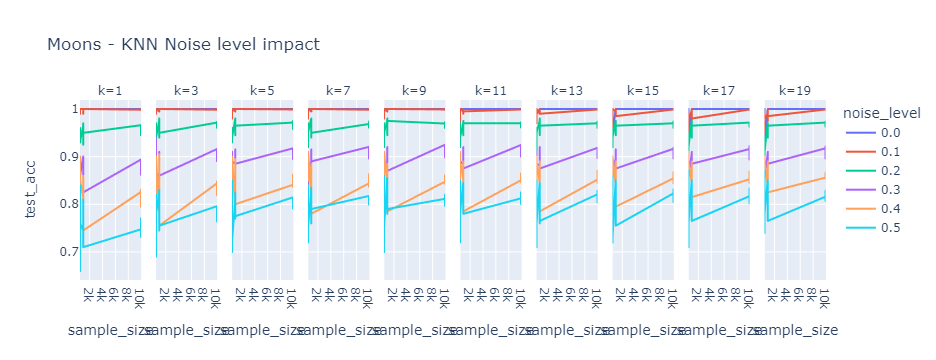

In [211]:
px.line(df_result_moons_knn, x='sample_size', y='test_acc', color='noise_level', title="Moons - KNN Noise level impact", facet_col='k' )

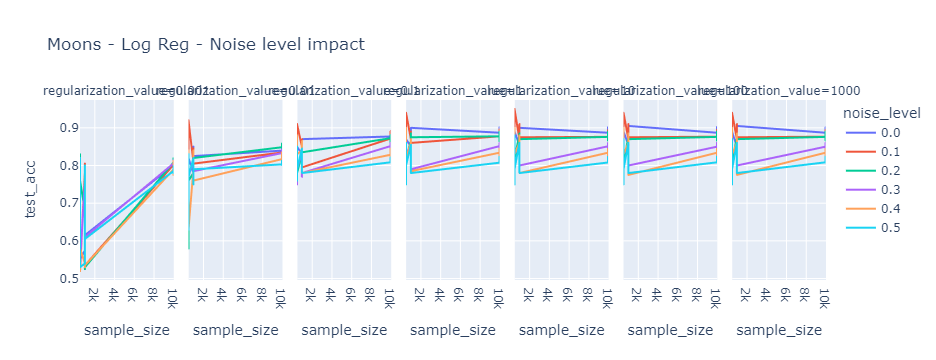

In [212]:
px.line(df_result_moons_log_reg, x='sample_size', y='test_acc', color='noise_level', title="Moons - Log Reg - Noise level impact", facet_col='regularization_value' )

#### Q7

##### Circles

For circles, KNN 1 is working with 100% accuracy also for the test samples of 500 to 10000 with minimal standard deviation.
As see in the questions before, logistic regression was not working well for it.



In [233]:
dfq7cknn = df_results.query('dataset=="circles" and clf_type=="knn"').groupby(['noise_level', 'sample_size']).apply(lambda grp: grp.sort_values(by=['test_acc','acc_diff','test_std'],ascending=[False,True,True]).head(1))
a=['k','test_acc','acc_diff','test_std']
print("Circle KNN \n",dfq7cknn[a])

Circle KNN 
                                k  test_acc  acc_diff  test_std
noise_level sample_size                                       
0.0         500         7      1    1.0000  0.000000  0.000000
            1000        211    1    1.0000  0.000000  0.000000
            10000       347    1    1.0000  0.000000  0.000000
0.1         500         517    1    0.8100  0.190000  0.122066
            1000        808    5    0.8050  0.046111  0.056789
            10000       865   17    0.8450  0.009389  0.018708
0.2         500         1115   7    0.7300  0.056667  0.134536
            1000        1300   3    0.7250  0.117222  0.092871
            10000       1508  11    0.6935  0.042833  0.027933
0.3         500         1664  17    0.6700  0.020000  0.078102
            1000        1827   3    0.6650  0.156111  0.089582
            10000       1988  19    0.6215  0.047056  0.034355
0.4         500         2134   5    0.6400  0.097778  0.190788
            1000        2379  19    0.6150

##### Moons

For moons, KNN 1 is working with 100% accurecy alos for the test samples of 500 to 10000 with minimal standsrd deviation for the 10000 sample. 
As see in the qustions before, logistic regression was not working well for it.


In [234]:
dfq7mknn = df_results.query('dataset=="moons" and clf_type=="knn"').groupby(['noise_level', 'sample_size']).apply(lambda grp: grp.sort_values(by=['test_acc','acc_diff','test_std'],ascending=[False,True,True]).head(1))
a=['k','test_acc','acc_diff','test_std']
print("Circle KNN \n",dfq7mknn[a])

Circle KNN 
                                k  test_acc      acc_diff  test_std
noise_level sample_size                                           
0.0         500         3074  15    1.0000 -2.222222e-03  0.000000
            1000        3399  19    1.0000 -5.555556e-04  0.000000
            10000       3407   1    1.0000  0.000000e+00  0.000000
0.1         500         3737  15    1.0000 -5.555556e-03  0.000000
            1000        3834   5    1.0000 -3.888889e-03  0.000000
            10000       3940  13    1.0000 -3.888889e-04  0.000000
0.2         500         4107   7    0.9700 -1.111111e-03  0.064031
            1000        4314  13    0.9800 -2.777778e-03  0.024495
            10000       4463   5    0.9750  6.111111e-03  0.012042
0.3         500         4700   3    0.9400  1.111111e-02  0.080000
            1000        4875  13    0.9200  1.555556e-02  0.055678
            10000       4941   9    0.9250  6.888889e-03  0.015969
0.4         500         5214  11    0.9100 -8.888

### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [2]:
slope, intercept = 2.5, 6

In [3]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [4]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

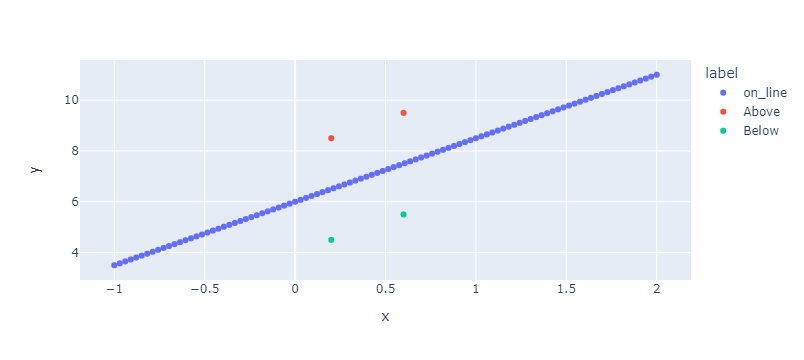

In [5]:
px.scatter(data, x='x', y='y', color = 'label')